In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report

In [2]:
# Load the dataset
data = pd.read_csv(
    "/Users/gabrielmancillas/Documents/GitHub/StudentPerformancePrediction/student_performance_prediction.csv"
)

In [3]:
# Display the first few rows of the dataset to understand its structure
print(data.head())

# Get summary statistics for numerical columns
print(data.describe())

# Check for missing values
print(data.isnull().sum())

  Student ID  Study Hours per Week  Attendance Rate  Previous Grades  \
0     S00001                  12.5              NaN             75.0   
1     S00002                   9.3             95.3             60.6   
2     S00003                  13.2              NaN             64.0   
3     S00004                  17.6             76.8             62.4   
4     S00005                   8.8             89.3             72.7   

  Participation in Extracurricular Activities Parent Education Level Passed  
0                                         Yes                 Master    Yes  
1                                          No            High School     No  
2                                          No              Associate     No  
3                                         Yes               Bachelor     No  
4                                          No                 Master     No  
       Study Hours per Week  Attendance Rate  Previous Grades
count          38005.000000     38008

In [4]:
# Percentage of missing data in each column
missing_data_percentage = data.isnull().mean() * 100
print(missing_data_percentage)

Student ID                                     0.0000
Study Hours per Week                           4.9875
Attendance Rate                                4.9800
Previous Grades                                4.9850
Participation in Extracurricular Activities    5.0000
Parent Education Level                         5.0000
Passed                                         5.0000
dtype: float64


Columns with missing values: Index(['Study Hours per Week', 'Attendance Rate', 'Previous Grades',
       'Participation in Extracurricular Activities', 'Parent Education Level',
       'Passed'],
      dtype='object')
Missing values after imputation:
 Student ID                                        0
Study Hours per Week                           1995
Attendance Rate                                   0
Previous Grades                                   0
Participation in Extracurricular Activities       0
Parent Education Level                            0
Passed                                         2000
dtype: int64
Missing values after imputation round 1:
 Student ID                                     0
Study Hours per Week                           0
Attendance Rate                                0
Previous Grades                                0
Participation in Extracurricular Activities    0
Parent Education Level                         0
Passed                             

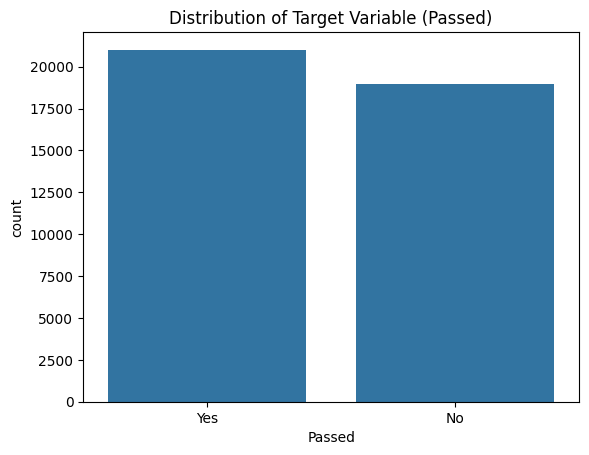

In [5]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Check columns with missing values
missing_columns = data.columns[data.isnull().any()]
print(f"Columns with missing values: {missing_columns}")

# Impute missing values in numerical columns (mean)
for col in ["Attendance Rate", "Previous Grades"]:
    if col in missing_columns:
        data[col] = data[col].fillna(data[col].mean())

# Impute missing values in categorical columns (mode)
for col in ["Participation in Extracurricular Activities", "Parent Education Level"]:
    if col in missing_columns:
        data[col] = data[col].fillna(data[col].mode()[0])

# Verify that missing values are handled
print("Missing values after imputation:\n", data.isnull().sum())


# Impute missing values in numerical columns using the mean
for col in ["Study Hours per Week", "Attendance Rate", "Previous Grades"]:
    if col in missing_columns:
        data[col] = data[col].fillna(data[col].mean())

# Impute missing values in categorical columns using the mode
for col in [
    "Participation in Extracurricular Activities",
    "Parent Education Level",
    "Passed",
]:
    if col in missing_columns:
        data[col] = data[col].fillna(data[col].mode()[0])

# Confirm that all missing values have been handled
print("Missing values after imputation round 1:\n", data.isnull().sum())


# Optional: Plot the distribution of the target variable 'Passed'
sns.countplot(x="Passed", data=data)
plt.title("Distribution of Target Variable (Passed)")
plt.show()

In [6]:
# Create interaction features
data["Study_Hours_Attendance"] = data["Study Hours per Week"] * data["Attendance Rate"]

# Binning Study Hours into categories (Low, Medium, High)
study_hours_bins = [0, 5, 15, data["Study Hours per Week"].max()]
study_hours_labels = ["Low", "Medium", "High"]
data["Study_Hours_Bin"] = pd.cut(
    data["Study Hours per Week"],
    bins=study_hours_bins,
    labels=study_hours_labels,
    right=False,
)

# Binning Attendance Rate into categories (Low, Medium, High)
attendance_bins = [0, 50, 80, 100]
attendance_labels = ["Low", "Medium", "High"]
data["Attendance_Bin"] = pd.cut(
    data["Attendance Rate"], bins=attendance_bins, labels=attendance_labels, right=False
)

# Polynomial Features for Study Hours and Attendance Rate
data["Study_Hours_Squared"] = data["Study Hours per Week"] ** 2
data["Attendance_Squared"] = data["Attendance Rate"] ** 2

# Check the new features added
print(data.head())

# save the cleaned data to a new csv file
data.to_csv("student_performance_prediction_cleaned.csv", index=False)

  Student ID  Study Hours per Week  Attendance Rate  Previous Grades  \
0     S00001                  12.5        75.276323             75.0   
1     S00002                   9.3        95.300000             60.6   
2     S00003                  13.2        75.276323             64.0   
3     S00004                  17.6        76.800000             62.4   
4     S00005                   8.8        89.300000             72.7   

  Participation in Extracurricular Activities Parent Education Level Passed  \
0                                         Yes                 Master    Yes   
1                                          No            High School     No   
2                                          No              Associate     No   
3                                         Yes               Bachelor     No   
4                                          No                 Master     No   

   Study_Hours_Attendance Study_Hours_Bin Attendance_Bin  Study_Hours_Squared  \
0          

In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from pandas.testing import assert_frame_equal

# Sample DataFrame for testing
data = pd.DataFrame(
    {
        "Study Hours per Week": [2, 10, 20],
        "Attendance Rate": [30, 70, 90],
        "Passed": ["No", "Yes", "Yes"],
        "Student ID": [1, 2, 3],
    }
)

# Convert the target 'Passed' column to binary (1 = Yes, 0 = No)
y = data["Passed"].apply(lambda x: 1 if x == "Yes" else 0)

# Drop the unnecessary columns ('Passed' and 'Student ID') from the features
X = data.drop(columns=["Passed", "Student ID"])

# Split the data into training and testing sets (70% training, 30% testing)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# Apply the feature engineering code to the entire dataset for testing purposes
X["Study_Hours_Attendance"] = X["Study Hours per Week"] * X["Attendance Rate"]

study_hours_bins = [0, 5, 15, X["Study Hours per Week"].max() + 1]
study_hours_labels = ["Low", "Medium", "High"]
X["Study_Hours_Bin"] = pd.cut(
    X["Study Hours per Week"],
    bins=study_hours_bins,
    labels=study_hours_labels,
    right=False,
    ordered=True,
)

attendance_bins = [0, 50, 80, 100]
attendance_labels = ["Low", "Medium", "High"]
X["Attendance_Bin"] = pd.cut(
    X["Attendance Rate"],
    bins=attendance_bins,
    labels=attendance_labels,
    right=False,
    ordered=True,
)

X["Study_Hours_Squared"] = X["Study Hours per Week"] ** 2
X["Attendance_Squared"] = X["Attendance Rate"] ** 2

# Expected DataFrame after feature engineering
expected_data = pd.DataFrame(
    {
        "Study Hours per Week": [2, 10, 20],
        "Attendance Rate": [30, 70, 90],
        "Study_Hours_Attendance": [60, 700, 1800],
        "Study_Hours_Bin": pd.Categorical(
            ["Low", "Medium", "High"],
            categories=["Low", "Medium", "High"],
            ordered=True,
        ),
        "Attendance_Bin": pd.Categorical(
            ["Low", "Medium", "High"],
            categories=["Low", "Medium", "High"],
            ordered=True,
        ),
        "Study_Hours_Squared": [4, 100, 400],
        "Attendance_Squared": [900, 4900, 8100],
    }
)

# Test if the DataFrame matches the expected DataFrame
assert_frame_equal(X.reset_index(drop=True), expected_data)

print("All tests passed!")

All tests passed!


In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Sample DataFrame for testing
data = pd.DataFrame(
    {
        "Study Hours per Week": [2, 10, 20],
        "Attendance Rate": [30, 70, 90],
        "Passed": ["No", "Yes", "Yes"],
        "Student ID": [1, 2, 3],
    }
)

# Convert the target 'Passed' column to binary (1 = Yes, 0 = No)
y = data["Passed"].apply(lambda x: 1 if x == "Yes" else 0)

# Drop the unnecessary columns ('Passed' and 'Student ID') from the features
X = data.drop(columns=["Passed", "Student ID"])

# Split the data into training and testing sets (70% training, 30% testing)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# Apply the feature engineering code to the training set
X_train["Study_Hours_Attendance"] = (
    X_train["Study Hours per Week"] * X_train["Attendance Rate"]
)

study_hours_bins = [0, 5, 15, X_train["Study Hours per Week"].max() + 1]
study_hours_labels = ["Low", "Medium", "High"]
X_train["Study_Hours_Bin"] = pd.cut(
    X_train["Study Hours per Week"],
    bins=study_hours_bins,
    labels=study_hours_labels,
    right=False,
    ordered=True,
)

attendance_bins = [0, 50, 80, 100]
attendance_labels = ["Low", "Medium", "High"]
X_train["Attendance_Bin"] = pd.cut(
    X_train["Attendance Rate"],
    bins=attendance_bins,
    labels=attendance_labels,
    right=False,
    ordered=True,
)

X_train["Study_Hours_Squared"] = X_train["Study Hours per Week"] ** 2
X_train["Attendance_Squared"] = X_train["Attendance Rate"] ** 2

# Apply the same feature engineering to the test set
X_test["Study_Hours_Attendance"] = (
    X_test["Study Hours per Week"] * X_test["Attendance Rate"]
)

X_test["Study_Hours_Bin"] = pd.cut(
    X_test["Study Hours per Week"],
    bins=study_hours_bins,
    labels=study_hours_labels,
    right=False,
    ordered=True,
)

X_test["Attendance_Bin"] = pd.cut(
    X_test["Attendance Rate"],
    bins=attendance_bins,
    labels=attendance_labels,
    right=False,
    ordered=True,
)

X_test["Study_Hours_Squared"] = X_test["Study Hours per Week"] ** 2
X_test["Attendance_Squared"] = X_test["Attendance Rate"] ** 2

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform both training and testing data
X_train_scaled = scaler.fit_transform(
    X_train.drop(columns=["Study_Hours_Bin", "Attendance_Bin"])
)
X_test_scaled = scaler.transform(
    X_test.drop(columns=["Study_Hours_Bin", "Attendance_Bin"])
)

# Convert the scaled data back to DataFrame for further use
X_train_scaled = pd.DataFrame(
    X_train_scaled,
    columns=X_train.drop(columns=["Study_Hours_Bin", "Attendance_Bin"]).columns,
)
X_test_scaled = pd.DataFrame(
    X_test_scaled,
    columns=X_test.drop(columns=["Study_Hours_Bin", "Attendance_Bin"]).columns,
)

print("Data scaling completed.")

Data scaling completed.


In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Larger sample DataFrame for testing
data = pd.DataFrame(
    {
        "Study Hours per Week": [2, 10, 20, 5, 15, 25, 8, 12, 18, 22],
        "Attendance Rate": [30, 70, 90, 50, 80, 95, 60, 75, 85, 92],
        "Passed": ["No", "Yes", "Yes", "No", "Yes", "Yes", "No", "Yes", "Yes", "Yes"],
        "Student ID": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    }
)

# Convert the target 'Passed' column to binary (1 = Yes, 0 = No)
y = data["Passed"].apply(lambda x: 1 if x == "Yes" else 0)

# Drop the unnecessary columns ('Passed' and 'Student ID') from the features
X = data.drop(columns=["Passed", "Student ID"])

# Split the data into training and testing sets (70% training, 30% testing)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Apply the feature engineering code to the training set
X_train["Study_Hours_Attendance"] = (
    X_train["Study Hours per Week"] * X_train["Attendance Rate"]
)

study_hours_bins = [0, 5, 15, X_train["Study Hours per Week"].max() + 1]
study_hours_labels = ["Low", "Medium", "High"]
X_train["Study_Hours_Bin"] = pd.cut(
    X_train["Study Hours per Week"],
    bins=study_hours_bins,
    labels=study_hours_labels,
    right=False,
    ordered=True,
)

attendance_bins = [0, 50, 80, 100]
attendance_labels = ["Low", "Medium", "High"]
X_train["Attendance_Bin"] = pd.cut(
    X_train["Attendance Rate"],
    bins=attendance_bins,
    labels=attendance_labels,
    right=False,
    ordered=True,
)

X_train["Study_Hours_Squared"] = X_train["Study Hours per Week"] ** 2
X_train["Attendance_Squared"] = X_train["Attendance Rate"] ** 2

# Apply the same feature engineering to the test set
X_test["Study_Hours_Attendance"] = (
    X_test["Study Hours per Week"] * X_test["Attendance Rate"]
)

X_test["Study_Hours_Bin"] = pd.cut(
    X_test["Study Hours per Week"],
    bins=study_hours_bins,
    labels=study_hours_labels,
    right=False,
    ordered=True,
)

X_test["Attendance_Bin"] = pd.cut(
    X_test["Attendance Rate"],
    bins=attendance_bins,
    labels=attendance_labels,
    right=False,
    ordered=True,
)

X_test["Study_Hours_Squared"] = X_test["Study Hours per Week"] ** 2
X_test["Attendance_Squared"] = X_test["Attendance Rate"] ** 2

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform both training and testing data
X_train_scaled = scaler.fit_transform(
    X_train.drop(columns=["Study_Hours_Bin", "Attendance_Bin"])
)
X_test_scaled = scaler.transform(
    X_test.drop(columns=["Study_Hours_Bin", "Attendance_Bin"])
)

# Convert the scaled data back to DataFrame for further use
X_train_scaled = pd.DataFrame(
    X_train_scaled,
    columns=X_train.drop(columns=["Study_Hours_Bin", "Attendance_Bin"]).columns,
)
X_test_scaled = pd.DataFrame(
    X_test_scaled,
    columns=X_test.drop(columns=["Study_Hours_Bin", "Attendance_Bin"]).columns,
)

# Initialize the Logistic Regression model
log_reg = LogisticRegression()

# Fit the model on the training data
log_reg.fit(X_train_scaled, y_train)

# Predict on the test data
y_pred = log_reg.predict(X_test_scaled)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(report)

Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         2

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3



In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Load your dataset
# Replace 'your_dataset.csv' with the actual path to your dataset
data = pd.read_csv(
    "/Users/gabrielmancillas/Documents/GitHub/StudentPerformancePrediction/student_performance_prediction_cleaned.csv"
)

# Convert the target 'Passed' column to binary (1 = Yes, 0 = No)
y = data["Passed"].apply(lambda x: 1 if x == "Yes" else 0)

In [11]:
# Drop the unnecessary columns ('Passed' and 'Student ID') from the features
X = data.drop(columns=["Passed", "Student ID"])

# Split the data into training and testing sets (70% training, 30% testing)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Apply the feature engineering code to the training set
X_train["Study_Hours_Attendance"] = (
    X_train["Study Hours per Week"] * X_train["Attendance Rate"]
)

study_hours_bins = [0, 5, 15, X_train["Study Hours per Week"].max() + 1]
study_hours_labels = ["Low", "Medium", "High"]
X_train["Study_Hours_Bin"] = pd.cut(
    X_train["Study Hours per Week"],
    bins=study_hours_bins,
    labels=study_hours_labels,
    right=False,
    ordered=True,
)

attendance_bins = [0, 50, 80, 100]
attendance_labels = ["Low", "Medium", "High"]
X_train["Attendance_Bin"] = pd.cut(
    X_train["Attendance Rate"],
    bins=attendance_bins,
    labels=attendance_labels,
    right=False,
    ordered=True,
)

X_train["Study_Hours_Squared"] = X_train["Study Hours per Week"] ** 2
X_train["Attendance_Squared"] = X_train["Attendance Rate"] ** 2

In [12]:
# Apply the same feature engineering to the test set
X_test["Study_Hours_Attendance"] = (
    X_test["Study Hours per Week"] * X_test["Attendance Rate"]
)

X_test["Study_Hours_Bin"] = pd.cut(
    X_test["Study Hours per Week"],
    bins=study_hours_bins,
    labels=study_hours_labels,
    right=False,
    ordered=True,
)

X_test["Attendance_Bin"] = pd.cut(
    X_test["Attendance Rate"],
    bins=attendance_bins,
    labels=attendance_labels,
    right=False,
    ordered=True,
)

X_test["Study_Hours_Squared"] = X_test["Study Hours per Week"] ** 2
X_test["Attendance_Squared"] = X_test["Attendance Rate"] ** 2

In [16]:
print(data.columns)

Index(['Student ID', 'Study Hours per Week', 'Attendance Rate',
       'Previous Grades', 'Participation in Extracurricular Activities',
       'Parent Education Level', 'Passed', 'Study_Hours_Attendance',
       'Study_Hours_Bin', 'Attendance_Bin', 'Study_Hours_Squared',
       'Attendance_Squared'],
      dtype='object')


In [17]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Assuming X_train and X_test are already defined and include the necessary columns

# Create the 'Study_Hours_Bin' and 'Attendance_Bin' columns if they don't exist
study_hours_bins = [0, 5, 15, X_train["Study Hours per Week"].max() + 1]
study_hours_labels = ["Low", "Medium", "High"]
X_train["Study_Hours_Bin"] = pd.cut(
    X_train["Study Hours per Week"],
    bins=study_hours_bins,
    labels=study_hours_labels,
    right=False,
    ordered=True,
)
X_test["Study_Hours_Bin"] = pd.cut(
    X_test["Study Hours per Week"],
    bins=study_hours_bins,
    labels=study_hours_labels,
    right=False,
    ordered=True,
)

attendance_bins = [0, 50, 80, 100]
attendance_labels = ["Low", "Medium", "High"]
X_train["Attendance_Bin"] = pd.cut(
    X_train["Attendance Rate"],
    bins=attendance_bins,
    labels=attendance_labels,
    right=False,
    ordered=True,
)
X_test["Attendance_Bin"] = pd.cut(
    X_test["Attendance Rate"],
    bins=attendance_bins,
    labels=attendance_labels,
    right=False,
    ordered=True,
)

# Convert categorical columns to dummy variables
X_train = pd.get_dummies(
    X_train,
    columns=[
        "Participation in Extracurricular Activities",
        "Parent Education Level",
        "Study_Hours_Bin",
        "Attendance_Bin",
    ],
    drop_first=True,
)
X_test = pd.get_dummies(
    X_test,
    columns=[
        "Participation in Extracurricular Activities",
        "Parent Education Level",
        "Study_Hours_Bin",
        "Attendance_Bin",
    ],
    drop_first=True,
)

# Ensure both training and testing sets have the same columns after get_dummies
X_train, X_test = X_train.align(X_test, join="left", axis=1, fill_value=0)

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform both training and testing data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert the scaled data back to DataFrame for further use
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [18]:
# Initialize the Logistic Regression model
log_reg = LogisticRegression()

# Fit the model on the training data
log_reg.fit(X_train_scaled, y_train)

# Predict on the test data
y_pred = log_reg.predict(X_test_scaled)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(report)

Accuracy: 0.52475
Classification Report:
              precision    recall  f1-score   support

           0       0.49      0.03      0.05      5697
           1       0.53      0.98      0.68      6303

    accuracy                           0.52     12000
   macro avg       0.51      0.50      0.37     12000
weighted avg       0.51      0.52      0.38     12000

